<a href="https://colab.research.google.com/github/RaulPreciado/IS_4487/blob/main/week%2012%20hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from sklearn.metrics import confusion_matrix

[[2650 4120]
 [ 962 7018]]


[Text(0, 0.5, 'didAnswer'), Text(0, 1.5, 'didntAnswer')]

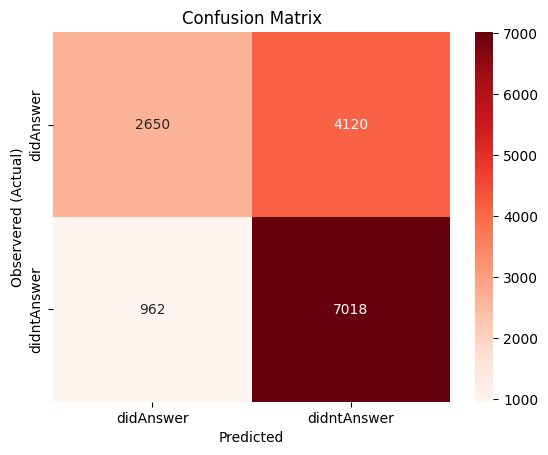

In [34]:
df = pd.read_csv (r'/content/adviseinvest.csv')

# Remove rows with NAs.
dropNAdf = df.dropna()
# Remove the row with the single outlier in num_accts. Filter with a logical condition
dropNumAcc = dropNAdf[dropNAdf.num_accts <= 5] 
# Remove the rows with negative income values. Filter with a logical condition.
dropNumIncome = dropNumAcc[dropNumAcc.income >= 0]
df_cleaned = dropNumIncome


x = df_cleaned[['income', 'female', 'age']] 
y = df_cleaned['answered']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

megatelco_tree = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Create Decision Tree Classifer
megatelco_tree = megatelco_tree.fit(x_train,y_train)



from six import StringIO
from IPython.display import Image
import pydotplus



dot_data = StringIO()
export_graphviz(megatelco_tree, out_file=dot_data, 
                   feature_names=x.columns,class_names=['didAnswer','didntAnswer'], 
                   filled=True,rounded=True, precision =5)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
megatelco_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
megatelco_tree = megatelco_tree.fit(x_train,y_train)
y_predict = megatelco_tree.predict(x_test)
megatelco_tree_matrix = confusion_matrix(y_test, y_predict)
print(megatelco_tree_matrix)
cm = sns.heatmap(megatelco_tree_matrix, annot=True, fmt='d',cmap='Reds')

cm.set_title('Confusion Matrix');
cm.set_xlabel('Predicted')
cm.set_ylabel('Observered (Actual)');

cm.xaxis.set_ticklabels(['didAnswer','didntAnswer'])
cm.yaxis.set_ticklabels(['didAnswer','didntAnswer'])